In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

In [2]:
dataframe = pd.read_csv('data/input_vectors.csv')

In [3]:
dataframe.columns
len(dataframe.columns)

75

In [4]:
class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = torch.tensor(self.data[index, :-1], dtype=torch.float32)
        y = torch.tensor(self.data[index, -1], dtype=torch.float32)
        return x, y

# Assuming you have a Pandas DataFrame called 'df'
dataset = PandasDataset(dataframe)

In [5]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

class PandasDatasetNormalised(Dataset):
    def __init__(self, dataframe):
        self.scaler = StandardScaler()
        print(type(dataframe.values))
        self.data = torch.tensor(dataframe.values, dtype=torch.float32)

        # Normalize the input features
        self.data[:, :-1] = torch.tensor(self.scaler.fit_transform(self.data[:, :-1]), dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index, :-1]
        y = self.data[index, -1]
        return x, y

# Assuming you have a Pandas DataFrame called 'dataset'
normalised_dataset = PandasDatasetNormalised(dataframe)

<class 'numpy.ndarray'>


<class 'list'>
[86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 90.0, 91.0, 100.0]
[773.0, 773.0, 773.0, 783.0, 786.4, 835.1, 1124.15, 1124.15, 1273.0, 2673.15]


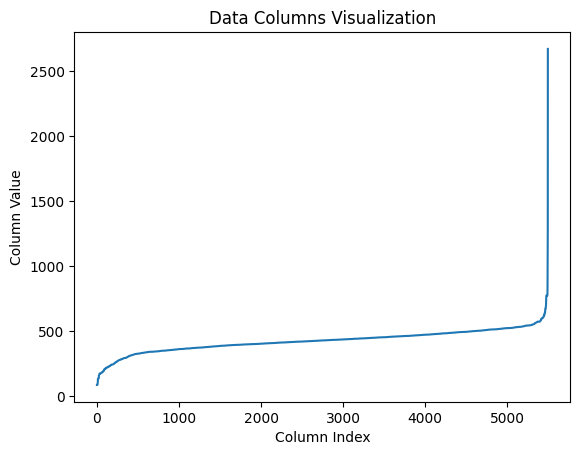

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the 'dataset' variable contains your PandasDataset object

# Access the first sample from the dataset
sample_index = 0
sample_x, sample_y = dataset[sample_index]

datalist = dataset.data

column_y = [dataset.data[i,-1] for i in range(0,len(dataset))]

print(type(column_y))
print(column_y[0:10])
print(column_y[-10:])

# Convert the PyTorch tensors to numpy arrays
sample_x = sample_x.numpy()
sample_y = sample_y.numpy()

# Plot the data columns
plt.figure()
plt.plot(column_y)
plt.xlabel('Column Index')
plt.ylabel('Column Value')
plt.title('Data Columns Visualization')
plt.show()

In [7]:
train_dataloader = DataLoader(dataset,batch_size=64,shuffle=True)